# Multiple Subplots

Based on Chapter 4 from *Python for Data Science Handbook*, by Jake VanderPlas.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn; seaborn.set()

#import warnings
#warnings.filterwarnings("ignore")

### `plt.axes`: Subplots by Hand

The most basic method of creating an axes is to use the `plt.axes` function. As we've seen previously, by default this creates a standard axes object that fills the entire figure. `plt.axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

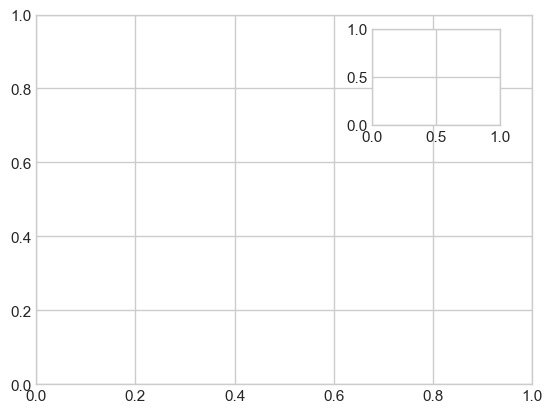

In [3]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is `fig.add_axes()`. Let's use this to create two vertically stacked axes:

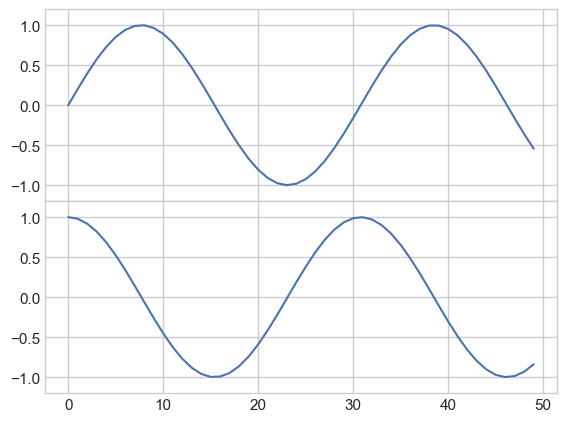

In [4]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)

ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## `plt.subplot`: Simple Grids of Subplots

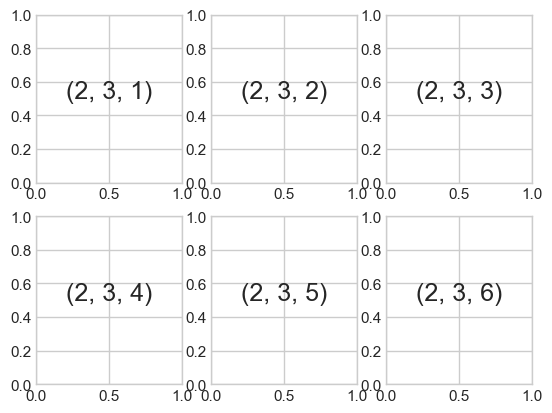

In [5]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

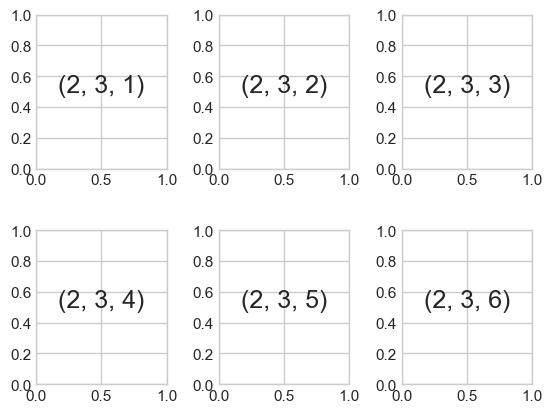

In [6]:
fig = plt.figure()

fig.subplots_adjust(hspace=0.4, wspace=0.4)    # adjust the spacing between these plots
                                               # in this case, the space is 40% of the subplot width and height
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

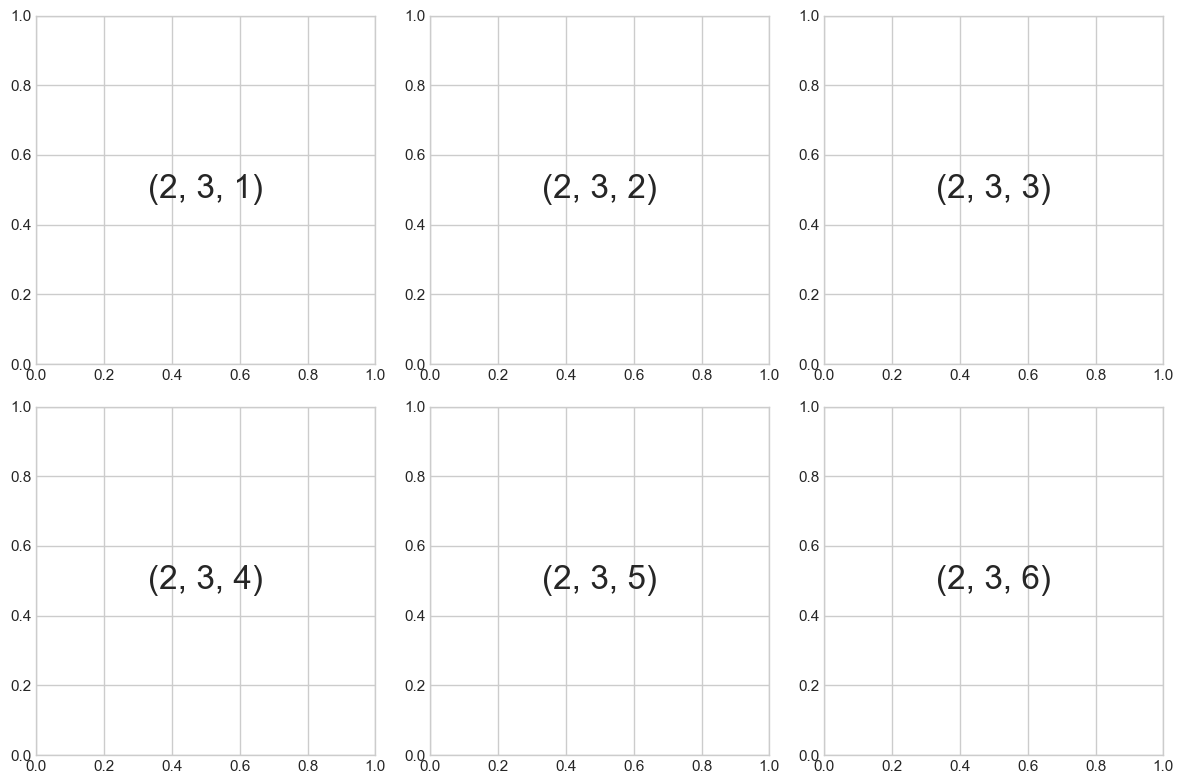

In [7]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create subplots and add text
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=24, ha='center', va='center')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## `plt.subplots`: The Whole Grid in One Go

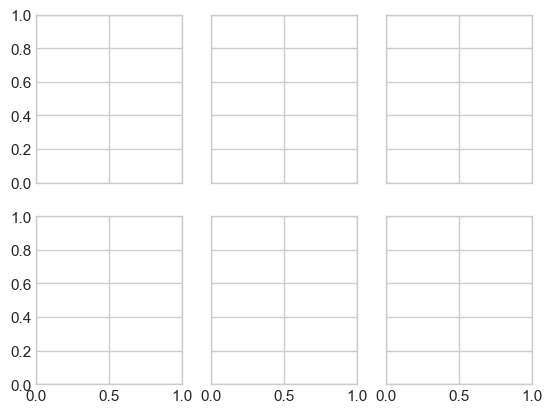

In [8]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

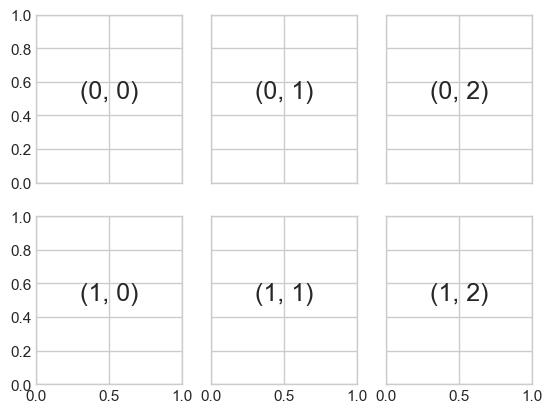

In [9]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

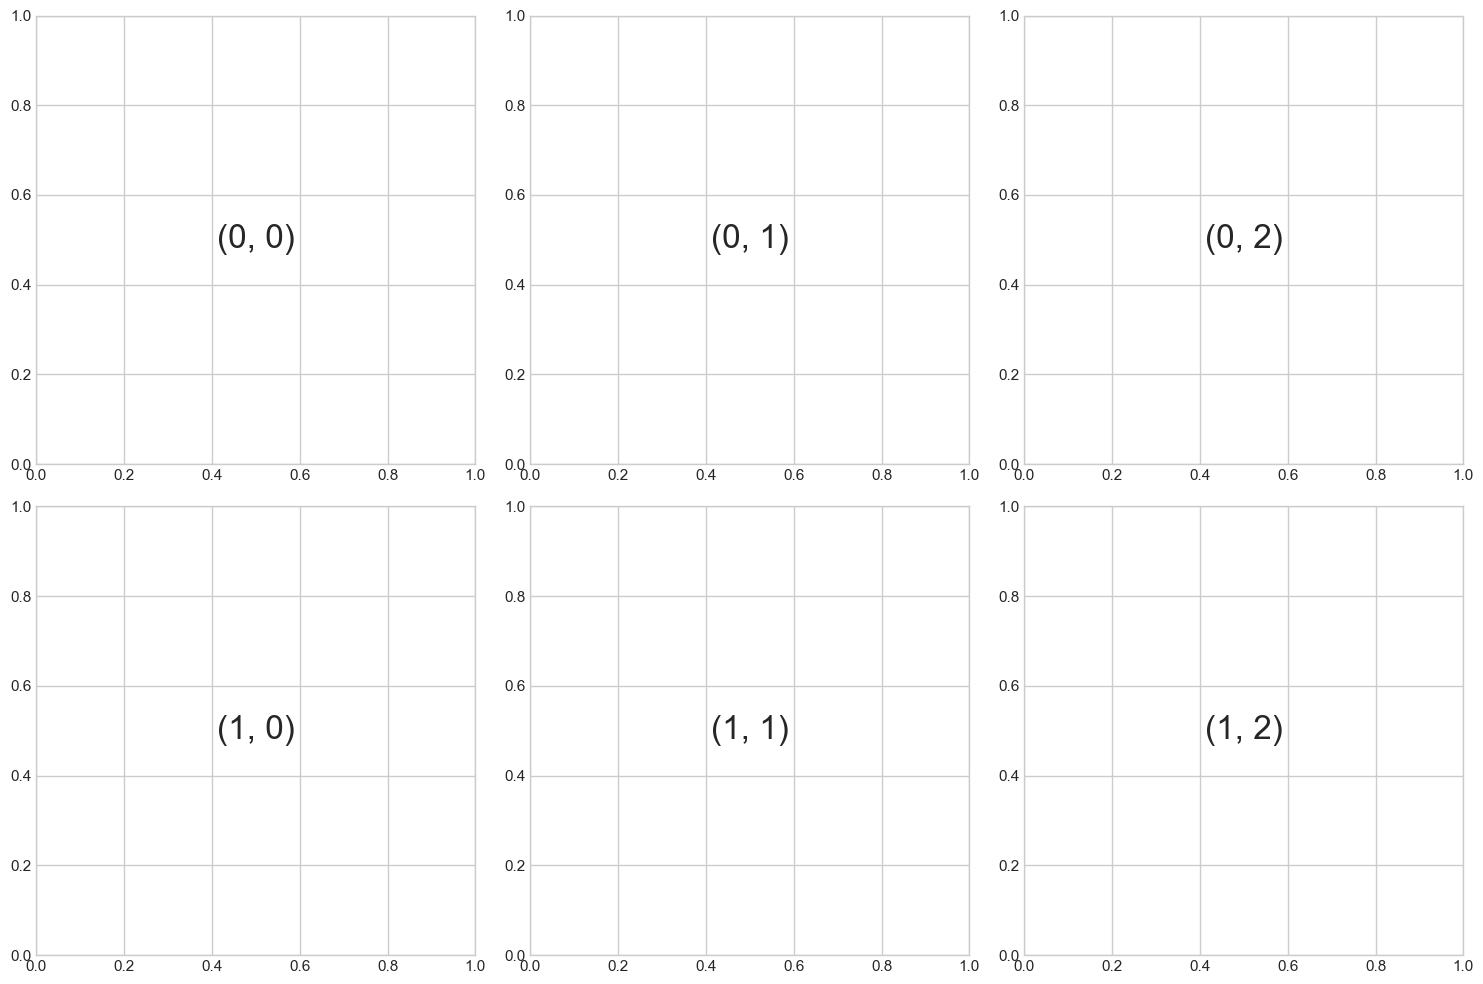

In [10]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # Increase figure size

# Add text to each subplot
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=24, ha='center', va='center')  # Increase font size

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### `plt.GridSpec`: More Complicated Arrangements

In [11]:
# 2x3 grid (2 rows, 3 columns), wspace and hspace specify the amount of width and height space reserved for blank space between subplots.
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

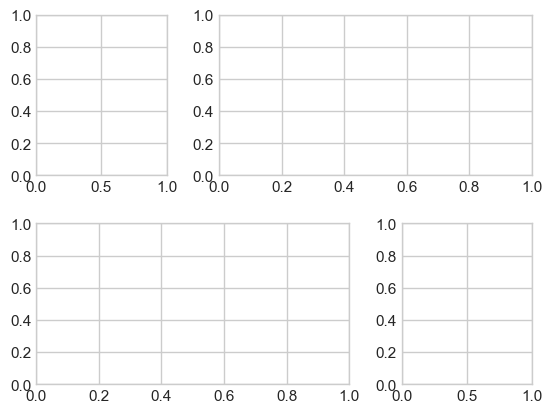

In [12]:
plt.subplot(grid[0, 0])    # Creates a subplot at the position defined by the first row (0) and first column (0).
plt.subplot(grid[0, 1:])   # Creates a subplot that spans from the first row (0) and the second column (1) to the end (:). 
plt.subplot(grid[1, :2])   # Creates a subplot that spans the second row (1) and the first two columns (:2). 
plt.subplot(grid[1, 2]);   # Creates a subplot at the position defined by the second row (1) and the third column (2).

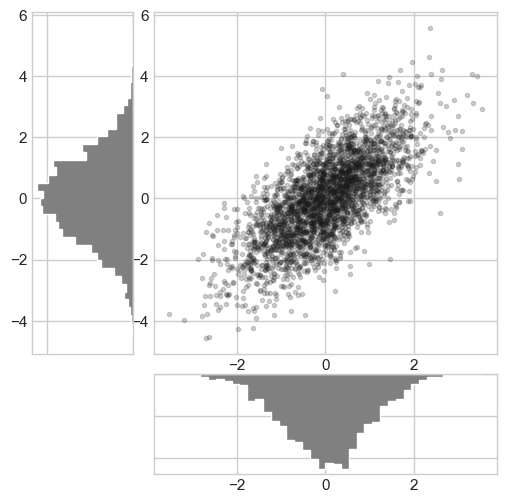

In [13]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# Text and Annotation

In [14]:
births = pd.read_csv('data/births.csv')

births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [15]:
births.shape

(15547, 5)

In [16]:
quartiles = np.percentile(births['births'], [25, 50, 75])

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

births2 = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births2.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [17]:
births2.shape

(14610, 5)

In [18]:
import matplotlib.dates as mdates

In [19]:
# Ensure 'day' is integer using .loc to avoid the warning
births2.loc[:, 'day'] = births2['day'].astype(int)

# Create a datetime index from year, month, and day
births2.index = pd.to_datetime(10000 * births2['year'] +
                               100 * births2['month'] +
                               births2['day'], format='%Y%m%d')

# Create a pivot table with the sum of births by month and day
births_by_date = births2.pivot_table('births', [births2.index.month, births2.index.day])

births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [20]:
# Use pd.Timestamp to create datetime objects for the new index
births_by_date.index = [pd.Timestamp(2012, month, day) for (month, day) in births_by_date.index]

# Display the result
print(births_by_date)

              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625
...              ...
2012-12-27  4850.150
2012-12-28  5044.200
2012-12-29  5120.150
2012-12-30  5172.350
2012-12-31  4859.200

[366 rows x 1 columns]


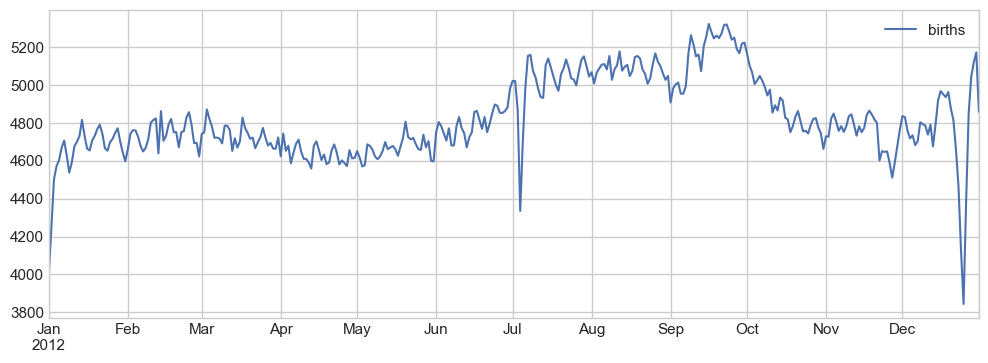

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))

births_by_date.plot(ax=ax);

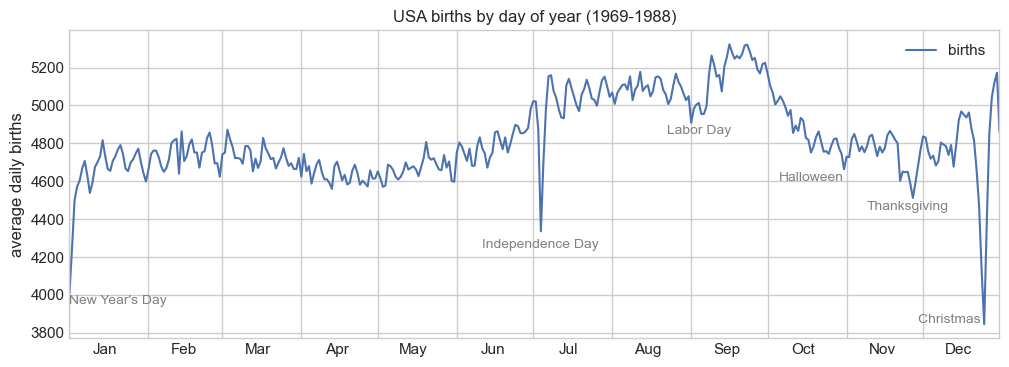

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'));

plt.show()

### Transforms and Text Position

`ax.transData`: Transform associated with data coordinates


`ax.transAxes`: Transform associated with the axes (in units of axes dimensions)


`fig.transFigure`: Transform associated with the figure (in units of figure dimensions)

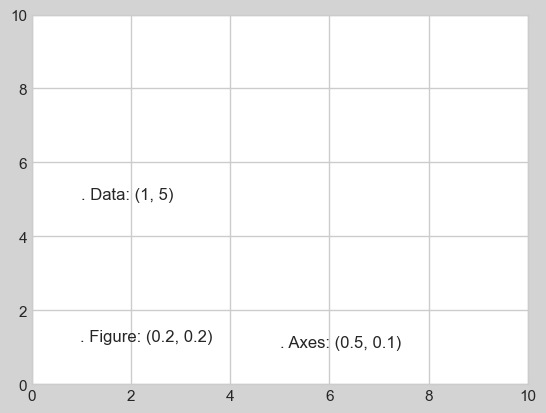

In [23]:
fig, ax = plt.subplots(facecolor='lightgray')  # test 'orange'
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Notice now that if we change the axes limits, it is only the transData coordinates that will be affected, while the others remain stationary:

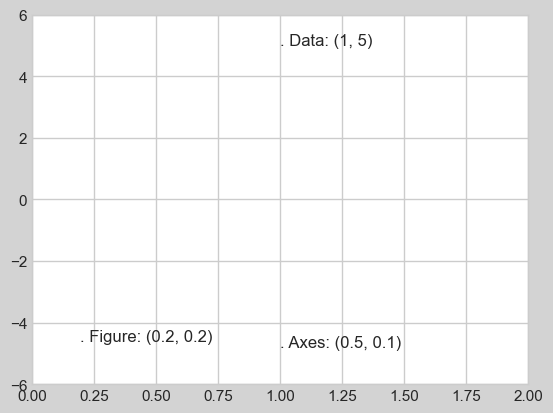

In [24]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation

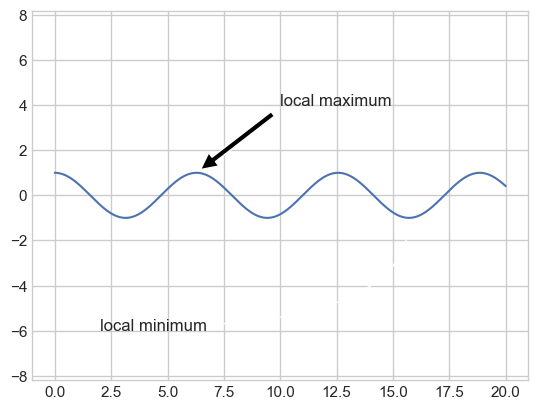

In [25]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

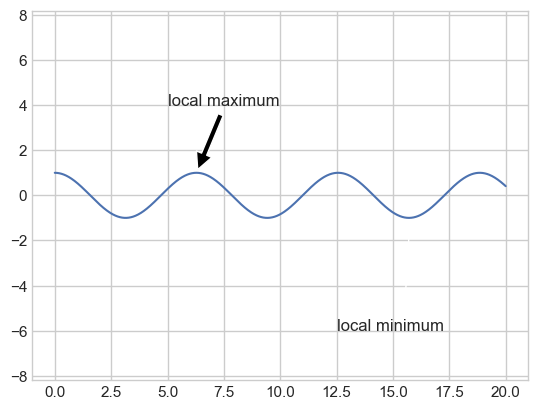

In [26]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(5, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(12.5, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

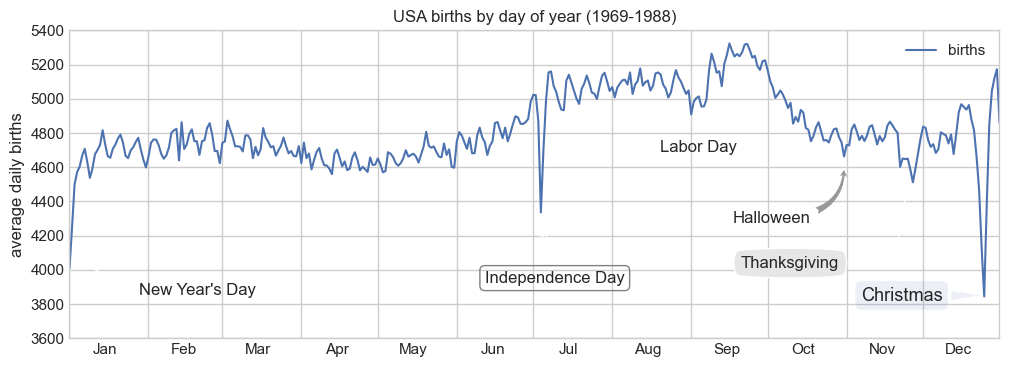

In [27]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.set_ylim(3600, 5400)

plt.show()

More in [Annotation Demo](https://matplotlib.org/2.0.2/examples/pylab_examples/annotation_demo2.html).

# Customizing Ticks

In [28]:
import matplotlib.ticker as ticker

### Major and Minor Ticks

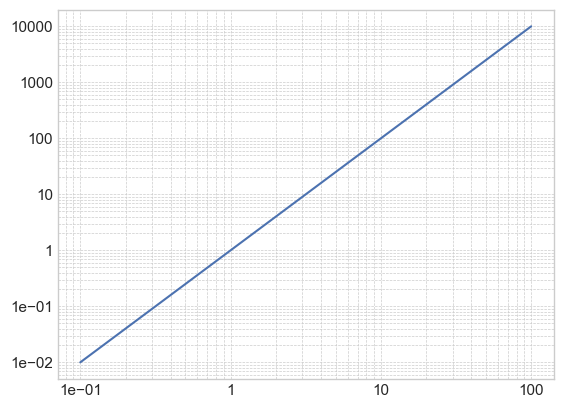

In [29]:
# Create some data
x = np.linspace(0.1, 100, 100)
y = x**2

# Create the plot with logarithmic scales
fig, ax = plt.subplots()
ax.plot(x, y)

# Set the scales to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# Set major and minor ticks for both axes
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

# Format the ticks
ax.xaxis.set_major_formatter(ticker.LogFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_major_formatter(ticker.LogFormatter())
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# Add gridlines
ax.grid(which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

### Business Analysis Example

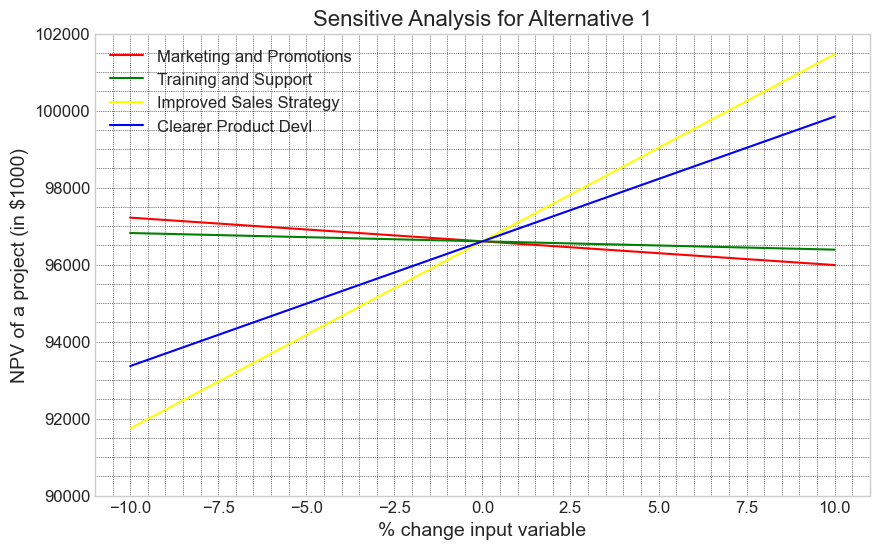

In [30]:
# Given points
points1 = [(0, 96604), (5, 96296)]  # Marketing and Promotions
points2 = [(0, 96604), (5, 96496)]  # Training and Support
points3 = [(0, 96604), (5, 99034)]  # Improved Sales Strategy
points4 = [(0, 96604), (5, 98224)]  # Clearer Product Devl

# Extract x and y coordinates for each set of points
x_coords1, y_coords1 = zip(*points1)
x_coords2, y_coords2 = zip(*points2)
x_coords3, y_coords3 = zip(*points3)
x_coords4, y_coords4 = zip(*points4)

# Fit straight lines through the points
coefficients1 = np.polyfit(x_coords1, y_coords1, 1)
coefficients2 = np.polyfit(x_coords2, y_coords2, 1)
coefficients3 = np.polyfit(x_coords3, y_coords3, 1)
coefficients4 = np.polyfit(x_coords4, y_coords4, 1)

poly_equation1 = np.poly1d(coefficients1)
poly_equation2 = np.poly1d(coefficients2)
poly_equation3 = np.poly1d(coefficients3)
poly_equation4 = np.poly1d(coefficients4)

# Generate x values for the desired range
x_values = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the polynomial equations
y_values1 = poly_equation1(x_values)
y_values2 = poly_equation2(x_values)
y_values3 = poly_equation3(x_values)
y_values4 = poly_equation4(x_values)

# Set figure size
plt.figure(figsize=(10, 6))

# Plotting the lines and points with larger fonts
plt.plot(x_values, y_values1, label='Marketing and Promotions', color='red')
plt.plot(x_values, y_values2, label='Training and Support', color='green')
plt.plot(x_values, y_values3, label='Improved Sales Strategy', color='yellow')
plt.plot(x_values, y_values4, label='Clearer Product Devl', color='blue')

# Set Y-axis limits
plt.ylim(90000, 102000)

# Set larger fonts for axis labels, title, and legend
plt.xlabel('% change input variable', fontsize=14)
plt.ylabel('NPV of a project (in $1000)', fontsize=14)
plt.title('Sensitive Analysis for Alternative 1', fontsize=16)
plt.legend(fontsize=12)

# Set larger fonts for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Enable minor ticks
plt.minorticks_on()

# Customize grid appearance for both major and minor ticks
plt.grid(which='both', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Faces Example

* The code creates a 5x5 grid of subplots.
* Each subplot displays an image from the faces array.
* All axis ticks and labels are removed for a cleaner presentation of the images.

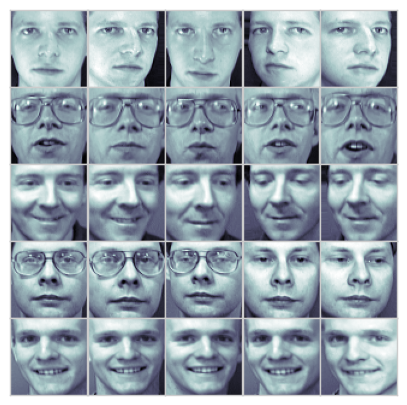

In [31]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces().images

for i in range(5):                                            # i represents the row index (0 to 4).
    for j in range(5):                                        # j represents the column index (0 to 4).
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())  
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())   # plt.NullLocator() is a function from Matplotlib that removes all ticks from an axis.
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")       # faces is assumed to be a list or array containing image data.

### `MultipleLocator`

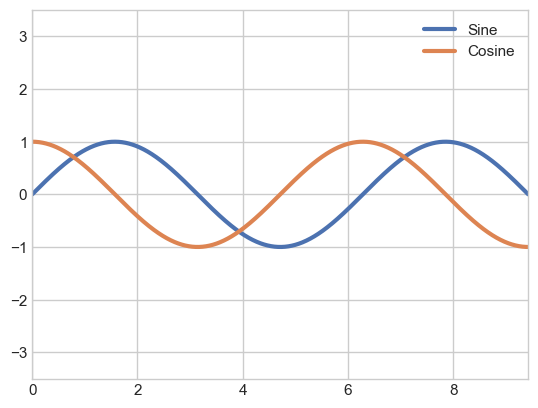

In [32]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

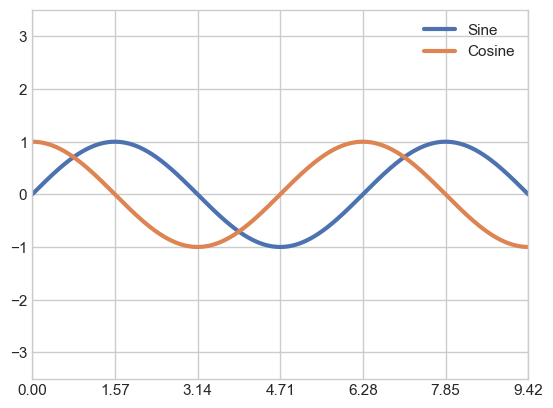

In [33]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

### `plt.FuncFormatter`

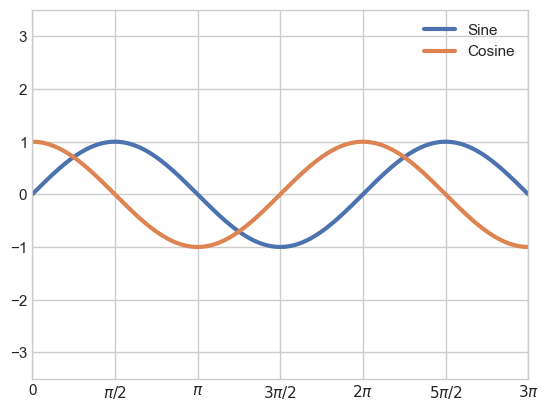

In [34]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

# Customizing Matplotlib: Configurations and Stylesheets

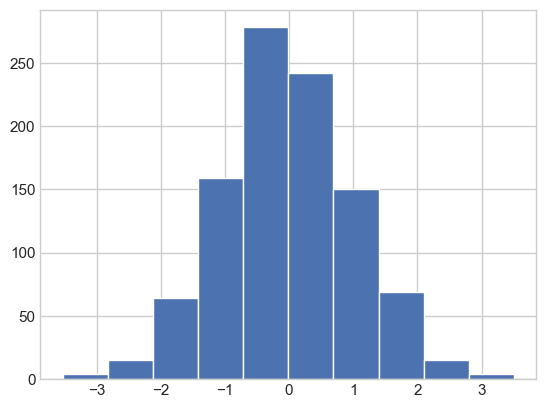

In [35]:
x = np.random.randn(1000)
plt.hist(x);

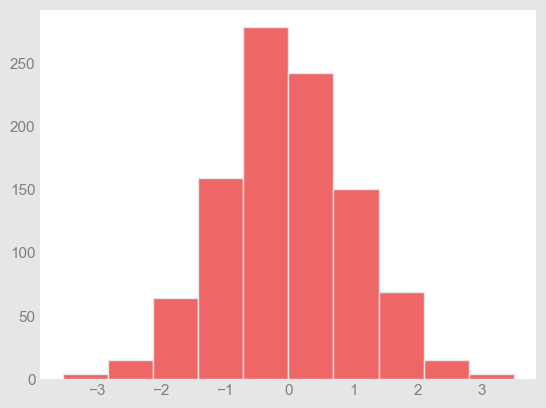

In [36]:
# Use a gray background
fig, ax = plt.subplots(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# Draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# Hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# Control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

plt.show()

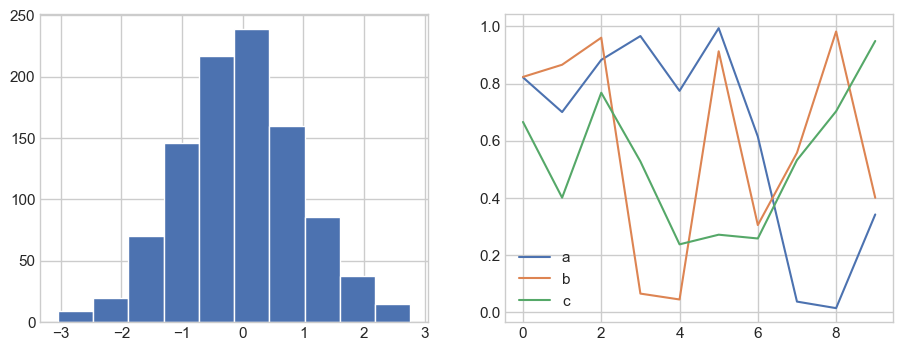

In [37]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

hist_and_lines()

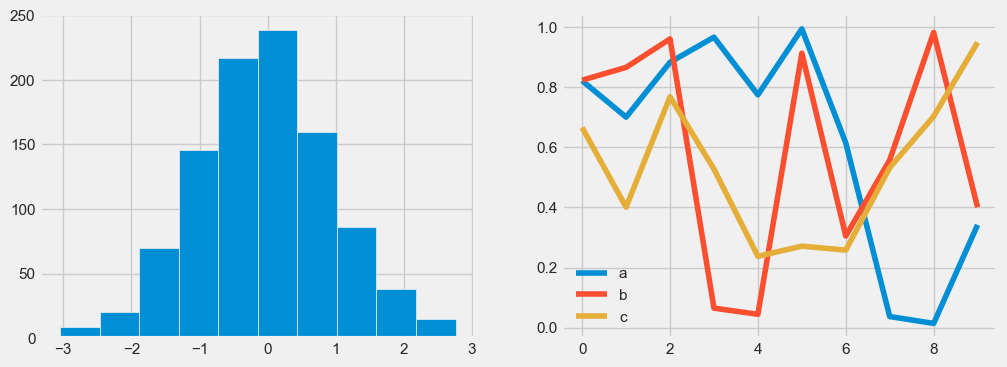

In [38]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

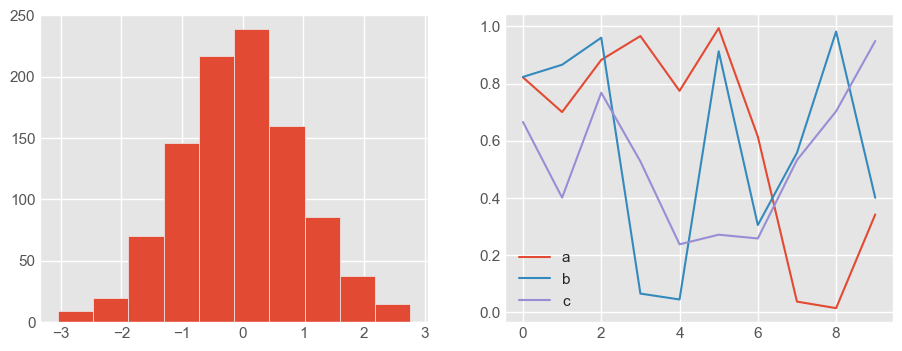

In [39]:
with plt.style.context('ggplot'):
    hist_and_lines()

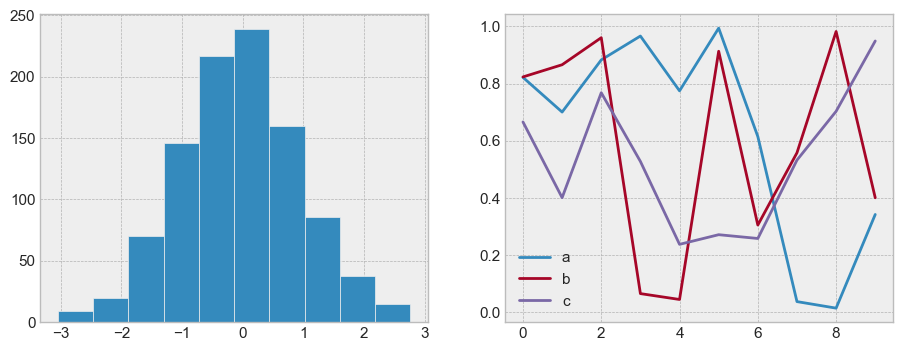

In [40]:
with plt.style.context('bmh'):
    hist_and_lines()

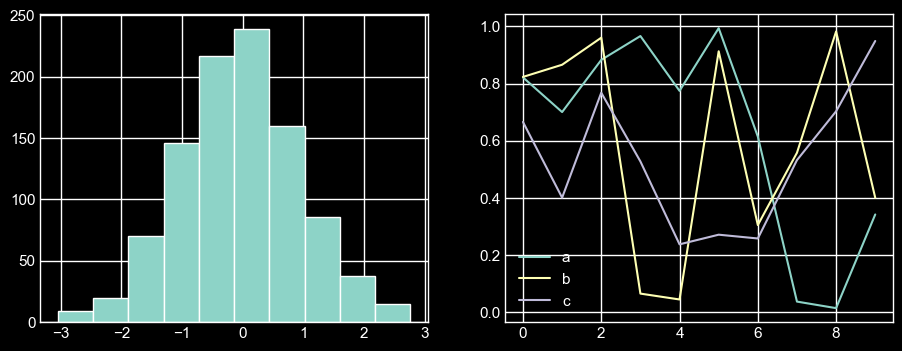

In [41]:
with plt.style.context('dark_background'):
    hist_and_lines()

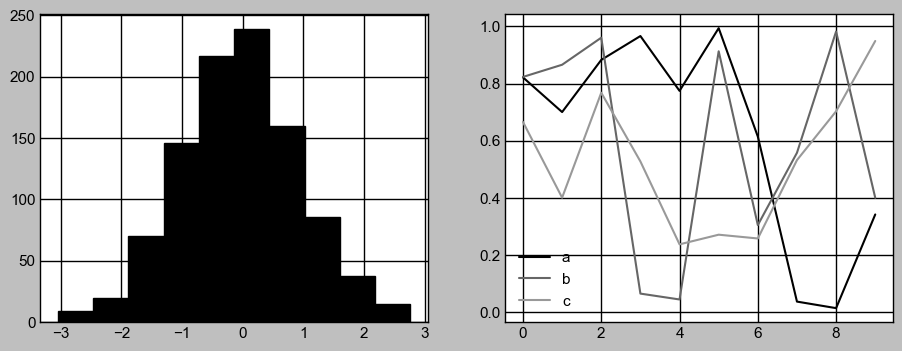

In [42]:
with plt.style.context('grayscale'):
    hist_and_lines()

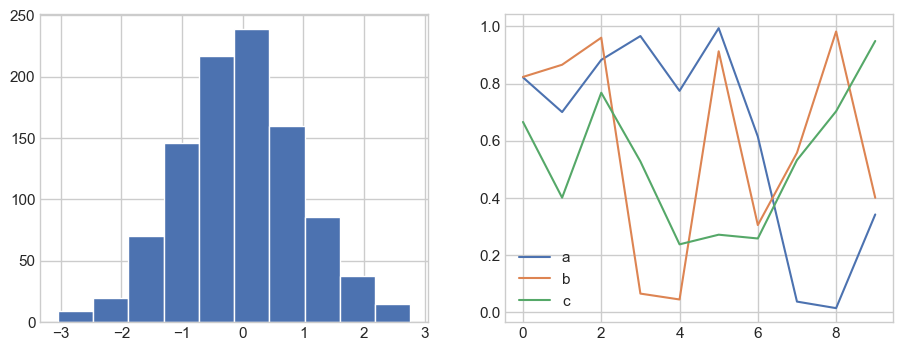

In [43]:
hist_and_lines()   # 'seaborn-v0_8-whitegrid'

# Three-Dimensional Plotting in Matplotlib

In [44]:
from mpl_toolkits import mplot3d

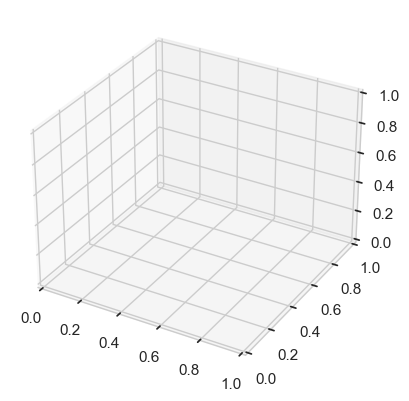

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')

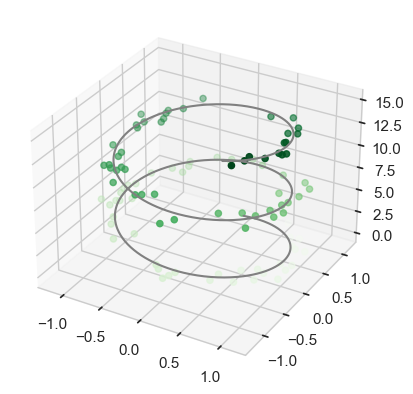

In [46]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [47]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

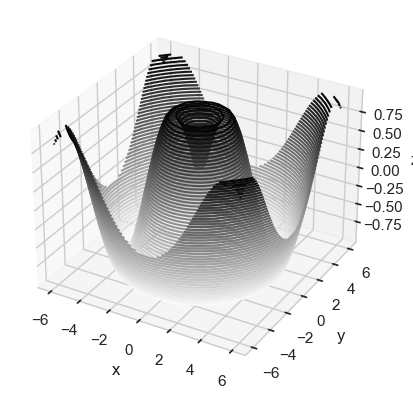

In [48]:
fig = plt.figure()

ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

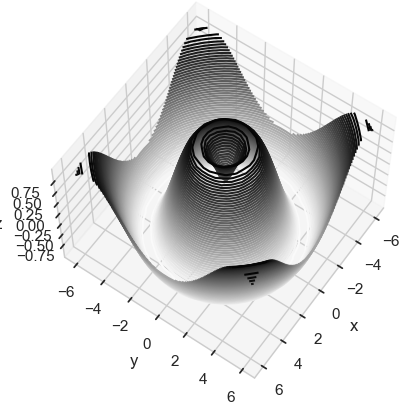

In [49]:
# Elevation of 60 degrees (that is, 60 degrees above the x-y plane) and 
# Azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis).

ax.view_init(60, 35)

fig

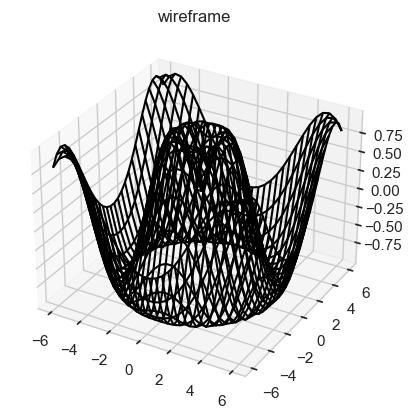

In [50]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

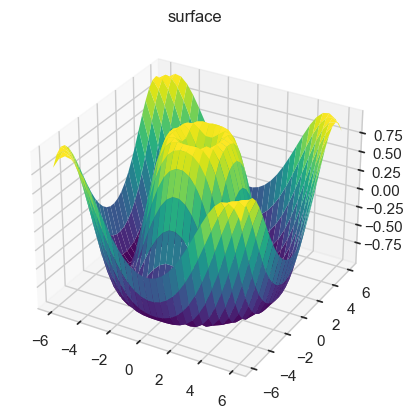

In [51]:
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_title('surface');

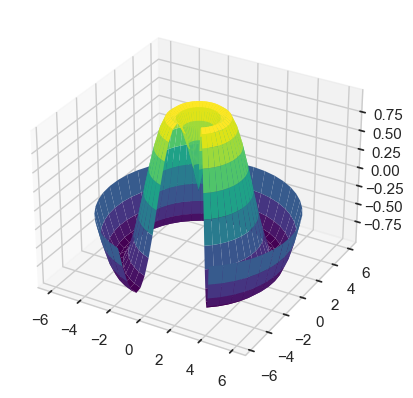

In [52]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)

r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

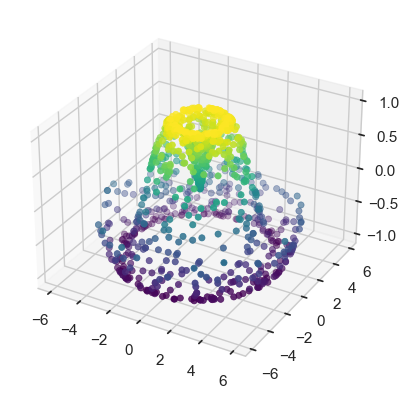

In [53]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))

z = f(x, y)

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

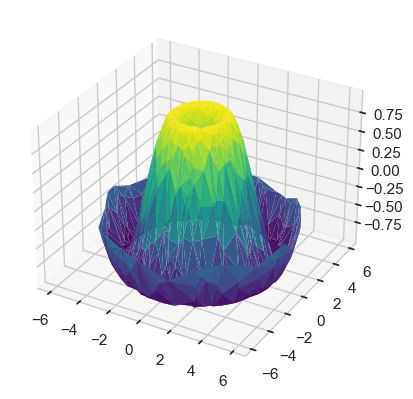

In [54]:
ax = plt.axes(projection='3d')

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

### Möbius Strip Example

In [55]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

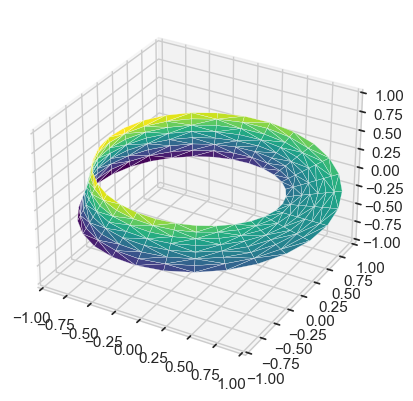

In [56]:
from matplotlib.tri import Triangulation

# triangulate in the underlying parametrization

tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

# Visualization with Seaborn

In [57]:
import seaborn as sns
sns.set()

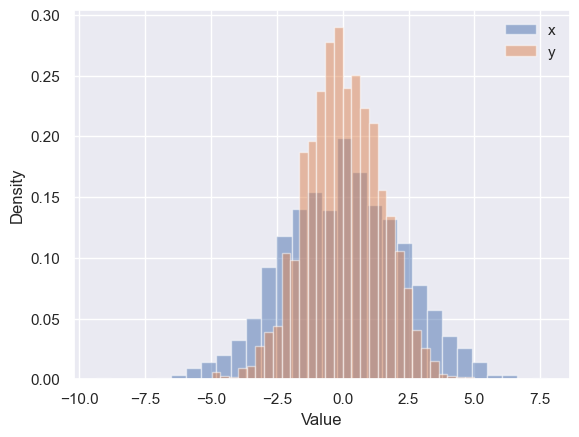

In [58]:
# Generate sample data
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Plot histograms
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5, bins=30, label=col)

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

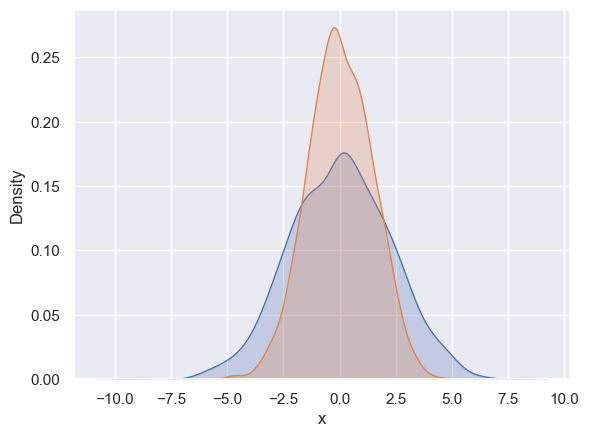

In [59]:
# Smooth estimate of the distribution using a kernel density estimation

for col in 'xy':
    sns.kdeplot(data[col], fill=True)

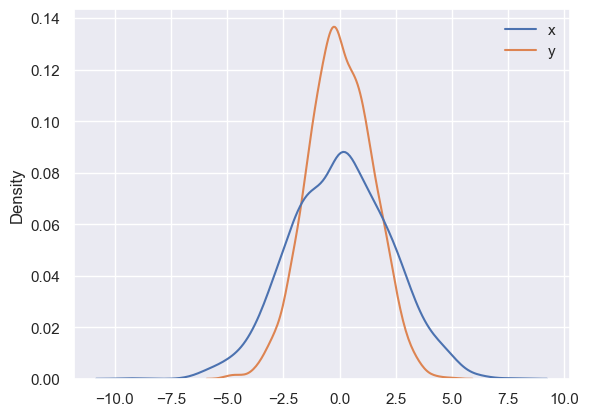

In [60]:
sns.kdeplot(data);

### Pair plots

In [61]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

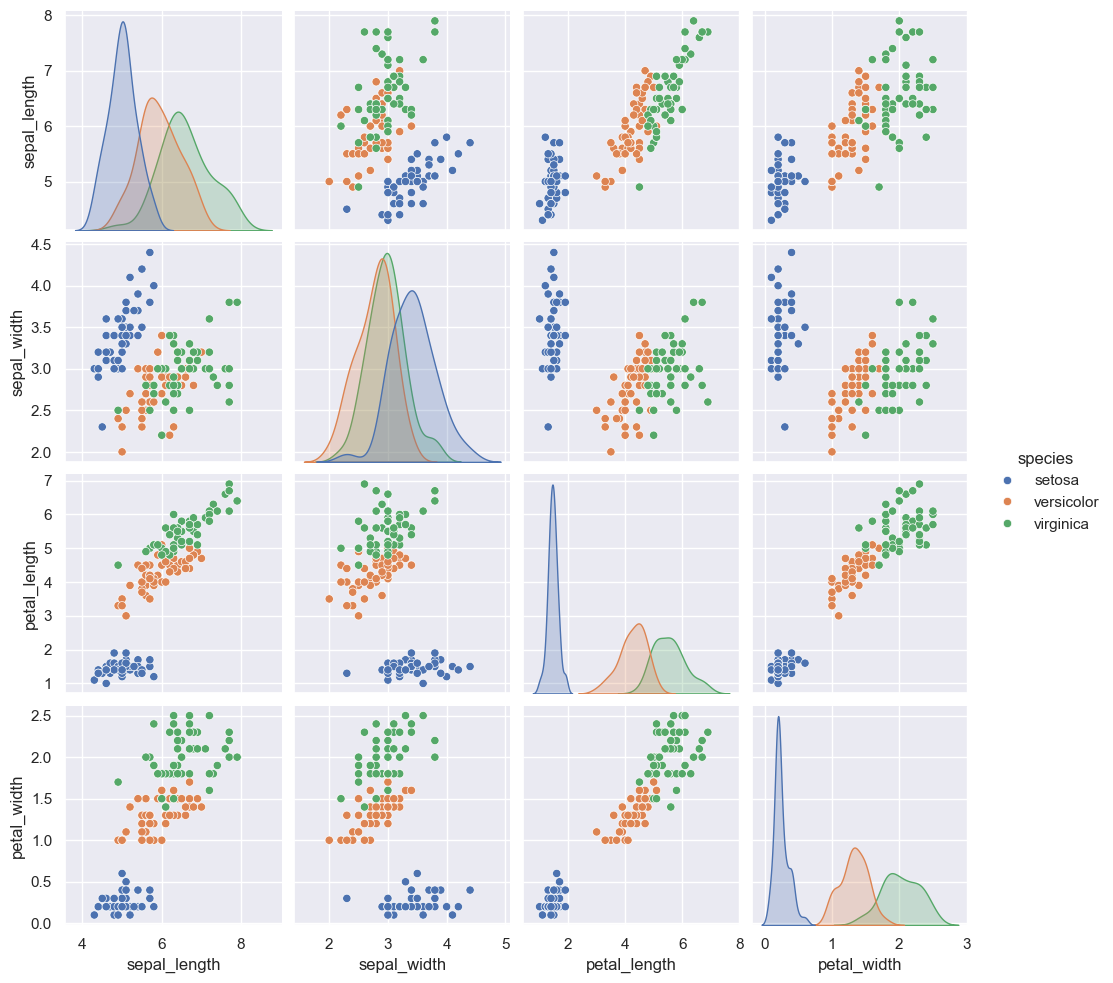

In [62]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

In [63]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

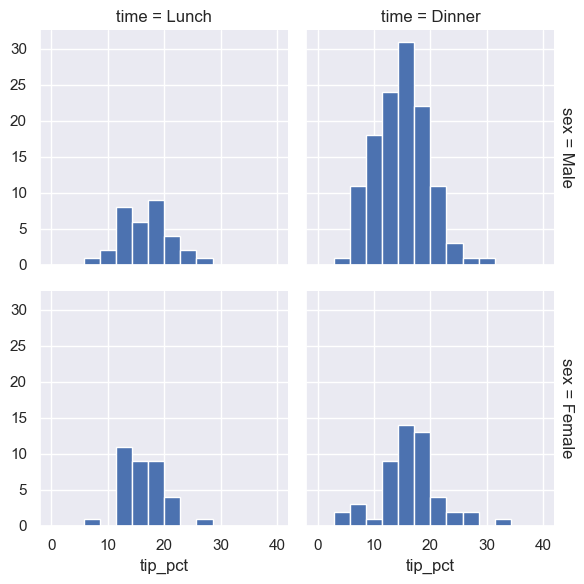

In [64]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Catplots

In [65]:
tips.head()

total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

* `sns.catplot()` allows you to create categorical plots, including box plots, by specifying the kind parameter.
* `x, y, hue`: Specify the variables to plot. x is for the x-axis, y is for the y-axis, and hue is used for grouping data by color.
* `kind = "box"`: Specifies that you want a box plot.
* `g.set_axis_labels()`: Updates the axis labels.

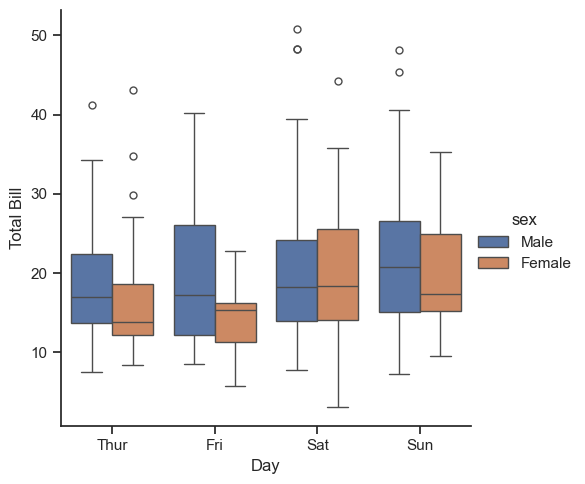

In [66]:
# Using sns.catplot instead of sns.factorplot
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

# Show the plot
plt.show()

### Joint distributions

* `x = "total_bill"`: Column to be plotted on the x-axis.
* `y = "tip"`: Column to be plotted on the y-axis.
* `data = tips`: DataFrame containing the data.
* `kind = 'hex'`: Specifies that you want a hexbin plot.

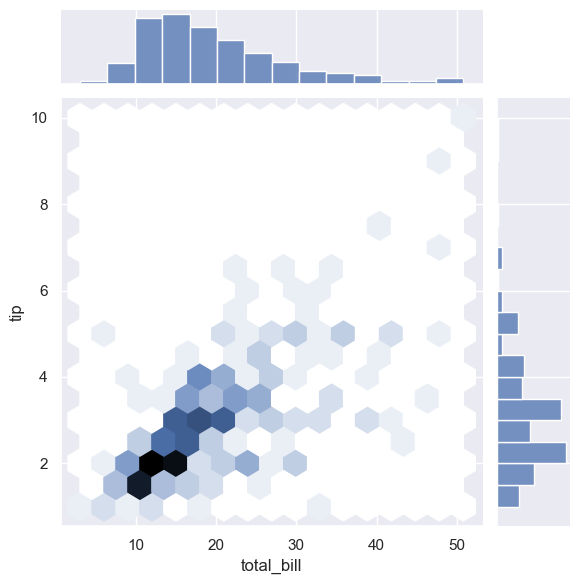

In [67]:
# Use jointplot with kind='hex'
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

# Show the plot
plt.show()

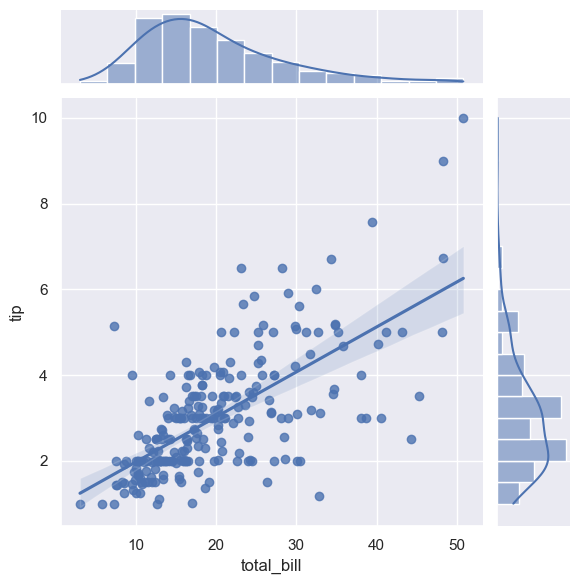

In [68]:
# Create a jointplot with regression line
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

# Show the plot
plt.show()

### Bar plots

In [69]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

* `sns.catplot()`: Replaces factorplot. Used to create categorical plots.
* `x="year"`: The column to plot on the x-axis.
* `data=planets`: The DataFrame containing the data.
* `aspect=2`: Adjusts the aspect ratio of the plot.
* `kind="count"`: Creates a count plot.
* `color='steelblue'`: Specifies the color of the bars.
* `plt.xticks()`: Used to set x-tick labels. Adjust ticks and labels to display every 5th year.

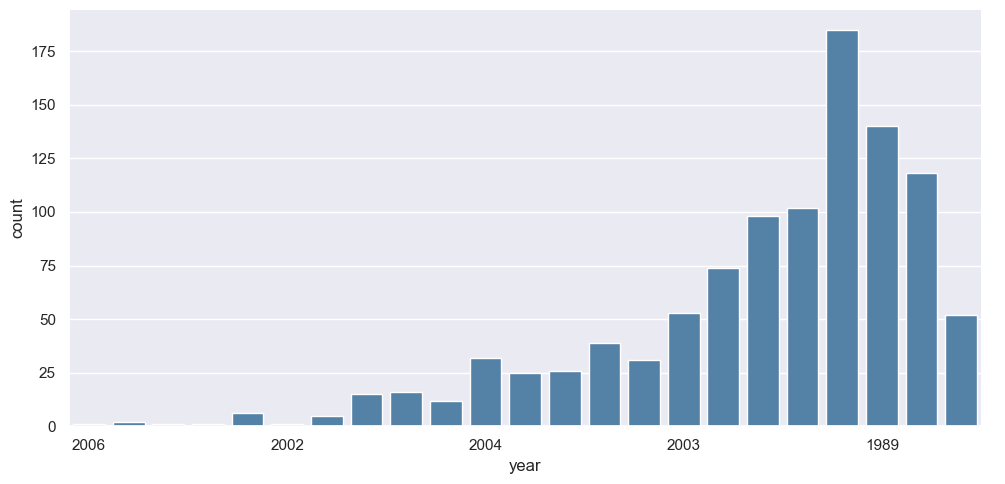

In [70]:
# Create a count plot with catplot
g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color='steelblue')

# Set the x-tick labels with a step of 5
plt.xticks(ticks=range(0, len(planets['year'].unique()), 5), 
           labels=[str(y) for y in planets['year'].unique()[::5]])

# Show the plot
plt.show()

* `sns.catplot()`: Replaces factorplot and is used for categorical plots.
* `x="year"`: The variable for the x-axis.
* `data=planets`: The DataFrame containing the data.
* `aspect=4.0`: Adjusts the aspect ratio of the plot.
* `kind='count'`: Creates a count plot.
* `hue='method'`: Adds color to the plot based on the 'method' column.
* `order=range(2001, 2015)`: Specifies the order of the x-tick labels.
* `g.set_ylabels()`: Sets the y-axis label for the plot.

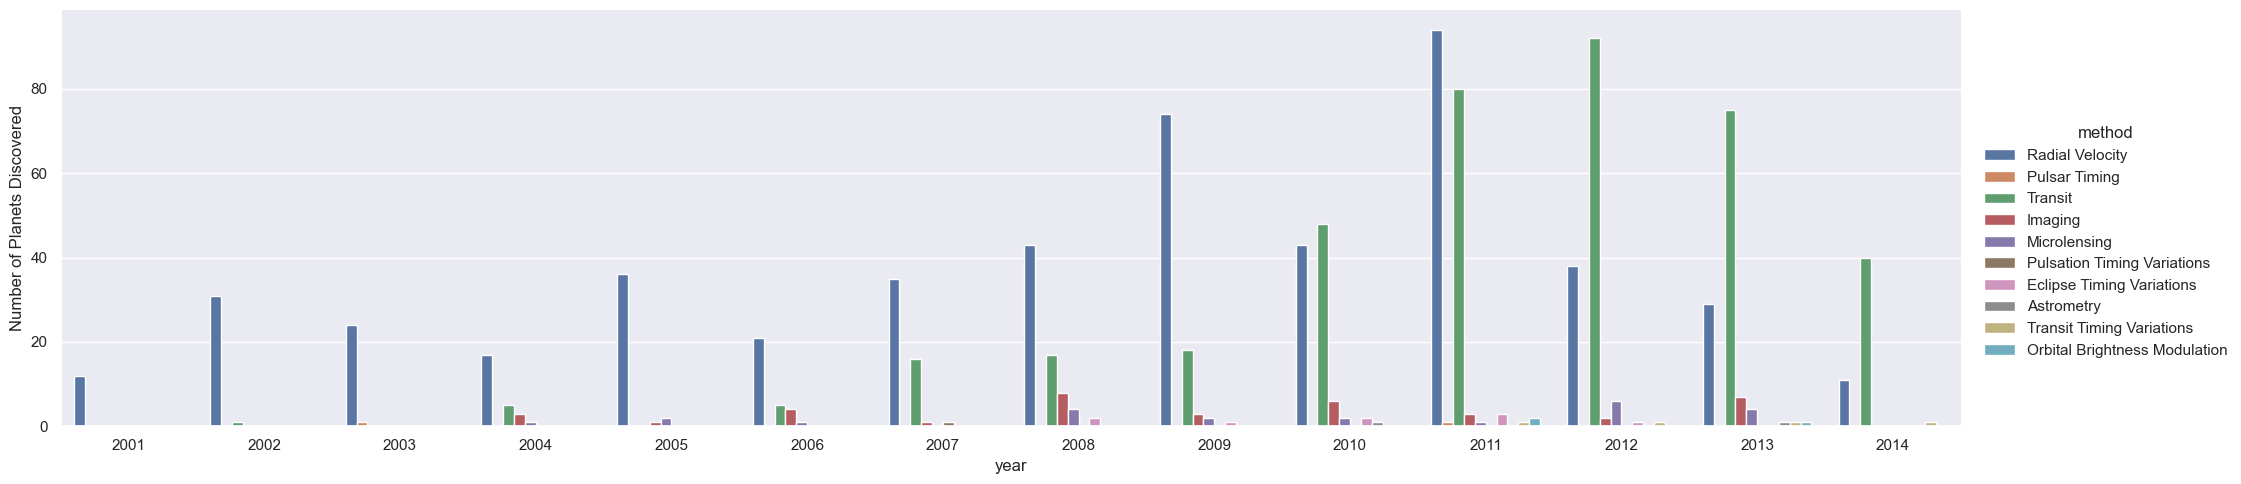

In [71]:
# Create a count plot with catplot
g = sns.catplot(
    x="year", 
    data=planets, 
    aspect=4.0, 
    kind='count',
    hue='method', 
    order=range(2001, 2015)
)

# Set the y-axis label
g.set_ylabels('Number of Planets Discovered')

# Show the plot
plt.show()

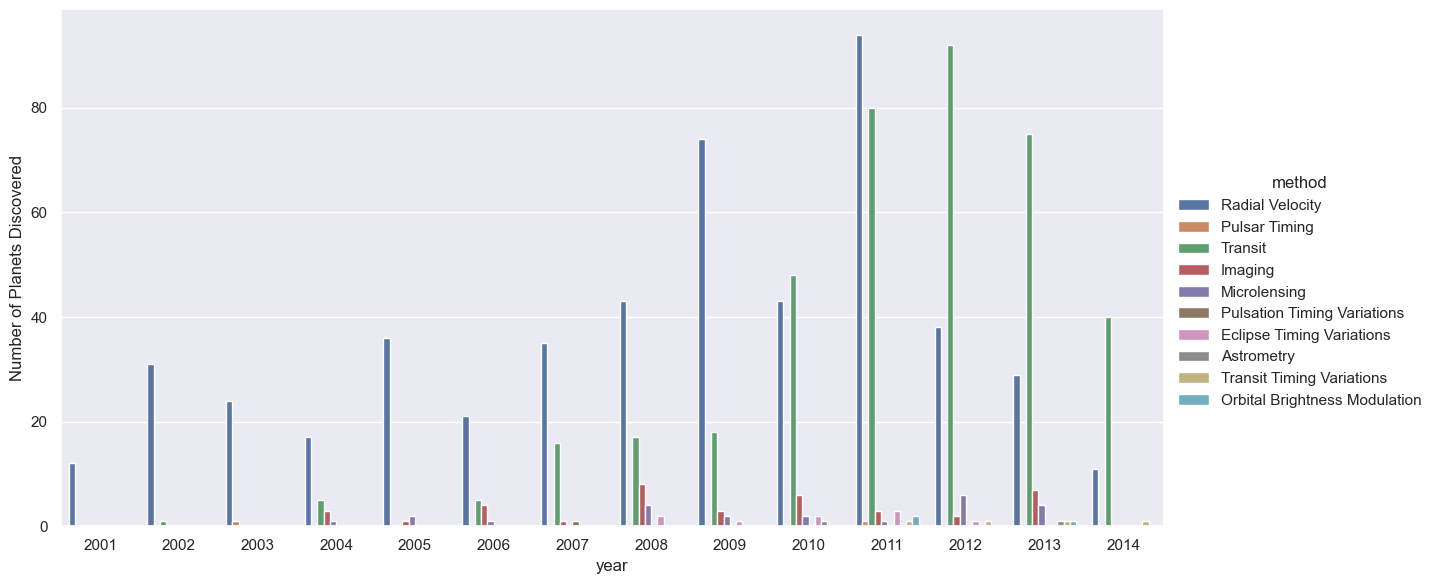

In [72]:
# Create a count plot with catplot and increase size
g = sns.catplot(
    x="year", 
    data=planets, 
    kind='count',
    hue='method', 
    order=range(2001, 2015),
    height=6,   # Height of each facet
    aspect=2    # Aspect ratio (width/height)
)

# Set the y-axis label
g.set_ylabels('Number of Planets Discovered')

# Show the plot
plt.show()

# Marathon Finishing Times Example

In [73]:
#!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [74]:
data = pd.read_csv('data/marathon-data.csv')
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

In [75]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [76]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

def format_timedelta(td):
    # Format the timedelta object as a string without the '0 days' part
    return str(td).split(' ')[-1]

# Load the data
data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

# Apply formatting to remove '0 days'
data['split'] = data['split'].apply(format_timedelta)
data['final'] = data['final'].apply(format_timedelta)

# Display the DataFrame
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

In [77]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing a converter for the times:

In [78]:
# Function to convert strings to timedelta
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.to_timedelta(f"{h}:{m}:{s}")

# Read the CSV file with converters
data = pd.read_csv('data/marathon-data.csv',
                   converters={'split': convert_time, 'final': convert_time})

# Convert timedelta64[ns] to seconds
data['split_sec'] = data['split'].astype('int64') / 1e9
data['final_sec'] = data['final'].astype('int64') / 1e9

print(data.dtypes)
print()
print(data.head())

age                    int64
gender                object
split        timedelta64[ns]
final        timedelta64[ns]
split_sec            float64
final_sec            float64
dtype: object

   age gender           split           final  split_sec  final_sec
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0


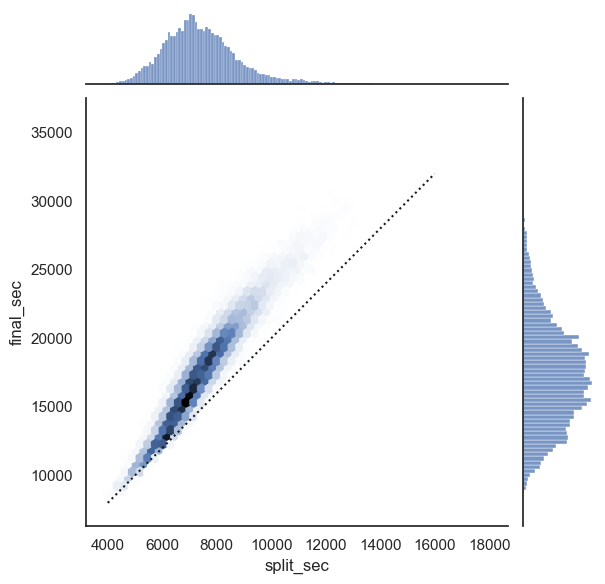

In [79]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [80]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

data.head()

age gender           split           final  split_sec  final_sec  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0   

   split_frac  
0   -0.018756  
1   -0.026262  
2   -0.022443  
3    0.009097  
4    0.006842

Where this split difference is less than zero, the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction:

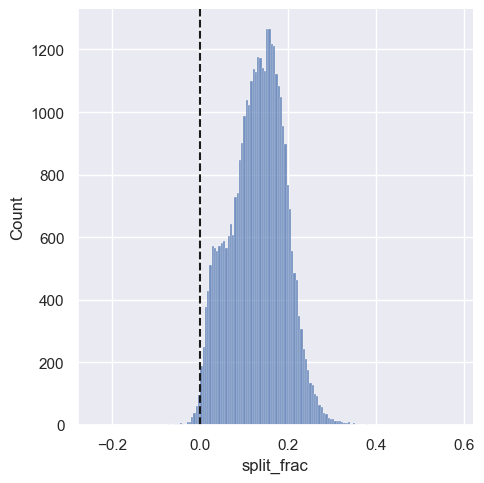

In [81]:
sns.displot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [82]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a `pairgrid`, which draws plots of all these correlations:

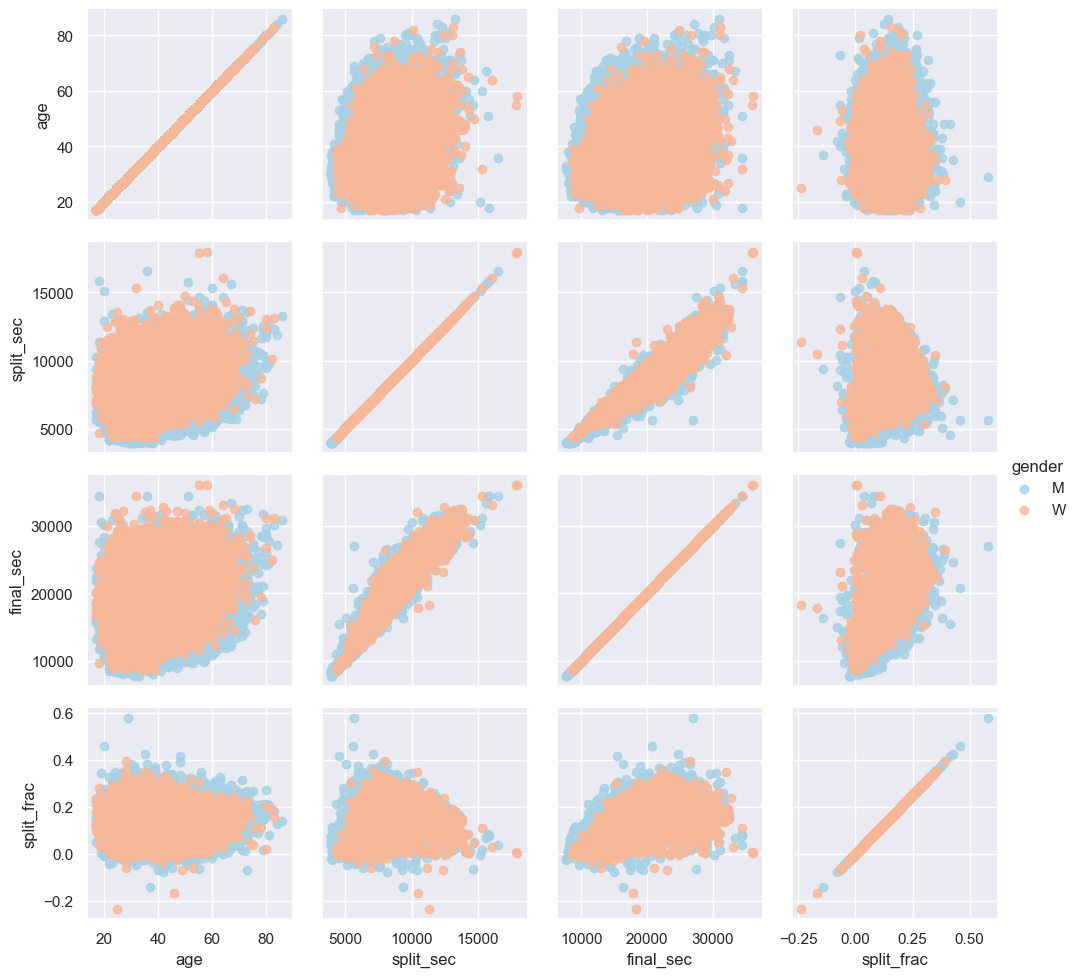

In [83]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time. (We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in Customizing Ticks can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:

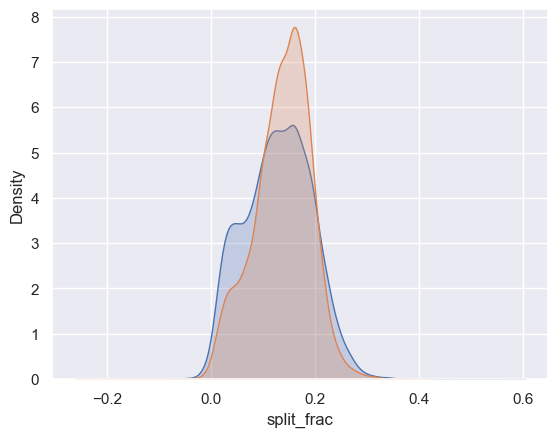

In [84]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)

plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split! This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a violin plot

<Axes: xlabel='gender', ylabel='split_frac'>

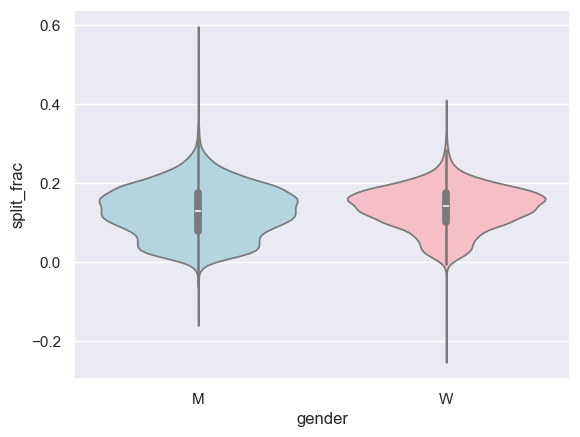

In [85]:
sns.violinplot(x="gender", y="split_frac", data=data, hue="gender", palette=["lightblue", "lightpink"], legend=False)

This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [86]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))

data.head()

age gender           split           final  split_sec  final_sec  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0   

   split_frac  age_dec  
0   -0.018756       30  
1   -0.026262       30  
2   -0.022443       30  
3    0.009097       30  
4    0.006842       30

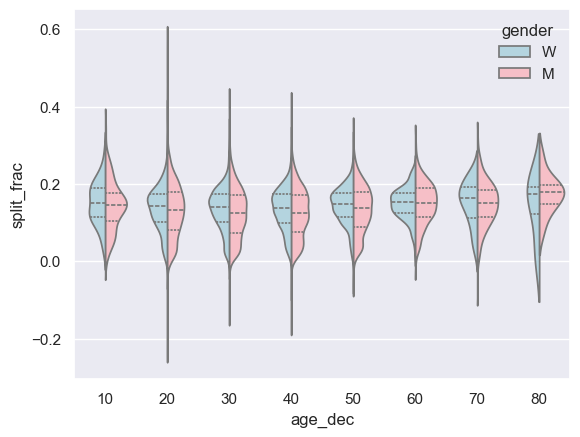

In [87]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [88]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use `regplot`, which will automatically fit a linear regression to the data:

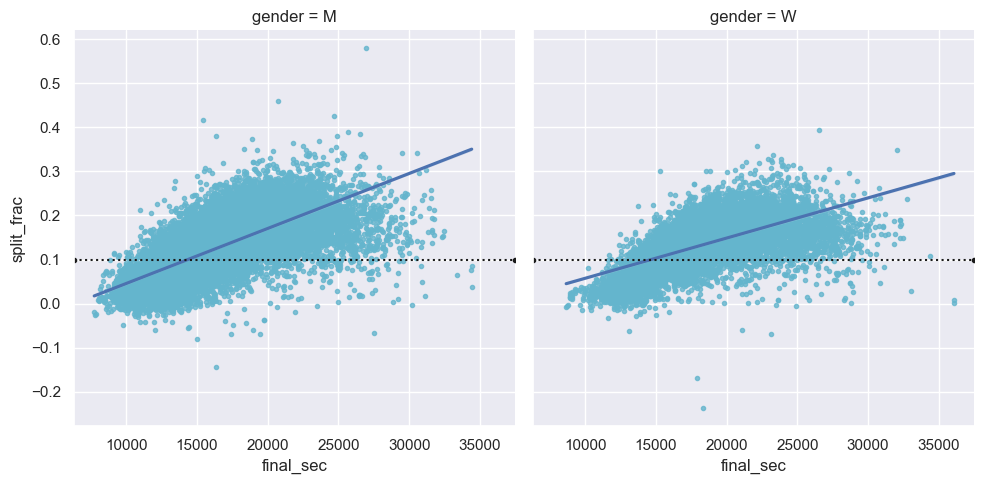

In [89]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.